In [250]:
from IPython.display import Image, display, Math
import sympy as sy
import math
import matplotlib.pyplot as plt
from numpy import *

DESAFIO 1:
Realizar a apresentação do dimensionamento do eixo que será apresentado. Levar em consideração aspectos como: material, fator de segurança escolhido, diâmetro e dimensionamento a fadiga.

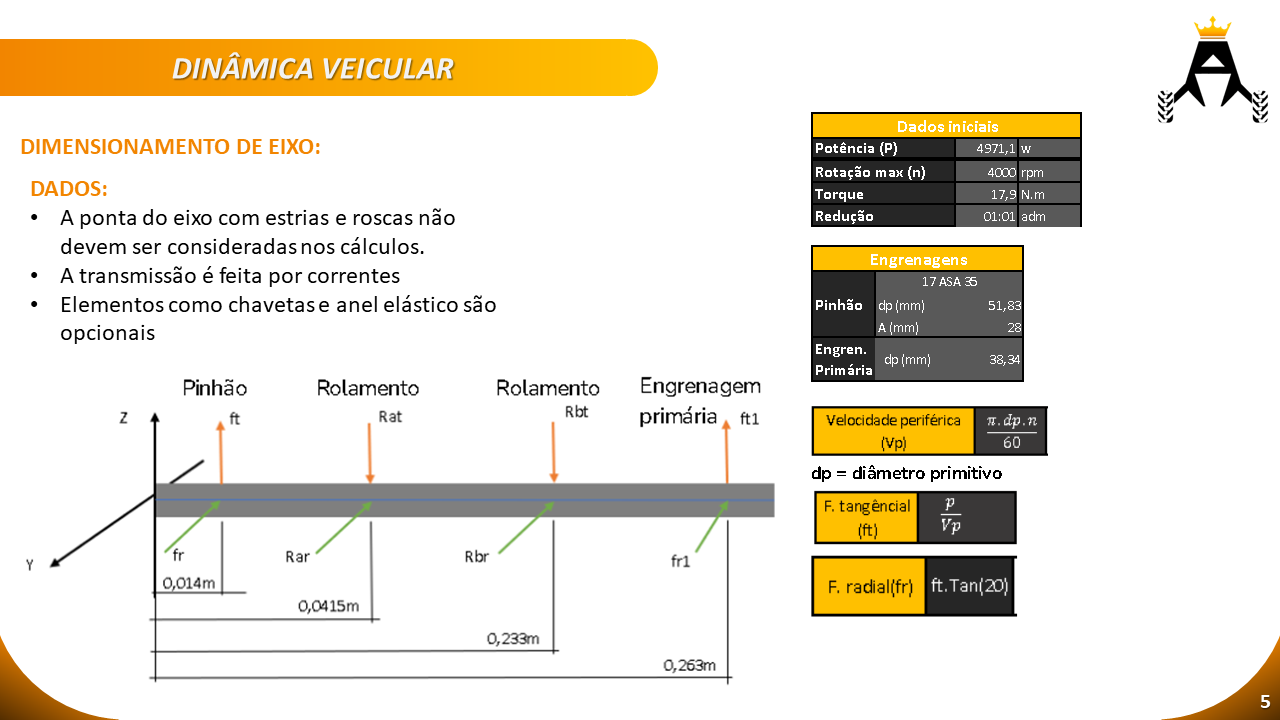

In [251]:
Image("Desafio 1.png")

In [252]:
'''Dados Iniciais'''
P = 4971.1 #W
n_rpm = 4000   #rpm
T = 17.9   #Nm
redução = 1

A primeira etapa foi calcular as forças tangenciais e forças radias presentes:

In [253]:
'''Engrenagens'''

# Pinhão
dp_pinhao = 51.83 * 10 ** -3 # m
A_pinhao = 28 * 10 ** -3 #m

# Engrenagem Primária
dp_primaria = 38.34 * 10 ** -3 # m

In [254]:
'''Forças no Pinhão'''

Vp_pinhao = (pi * dp_pinhao * n_rpm) / 60
ft = P / Vp_pinhao
fr = ft*tan(math.radians(20))
display(Math(f'f_t = {ft:.2f} N'))
display(Math(f'f_r = {fr:.2f} N'))
ft_fr_pos = 0.014

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [255]:
'''Forças na Engrenagem Primária'''

Vp_primaria = (pi * dp_primaria * n_rpm) / 60
ft1 = P / Vp_primaria
fr1 = ft1*tan(math.radians(20))
display(Math('f_{t1} = %s N'%round(ft1,2)))
display(Math('f_{r1} = %s N'%round(fr1,2)))
ft1_fr1_pos = 0.263

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

Para determinar a seção crítica por meio dos Diagramas de Esforço Cortante e Momento Fletor, utilizou-se a ferramenta Viga Online devido a sua simplicidade.

$$\text{Plano} \ XZ$$

In [256]:
# Reações de Apoio
Rat = 426.7194 # N
Rbt = 650.2906 # N

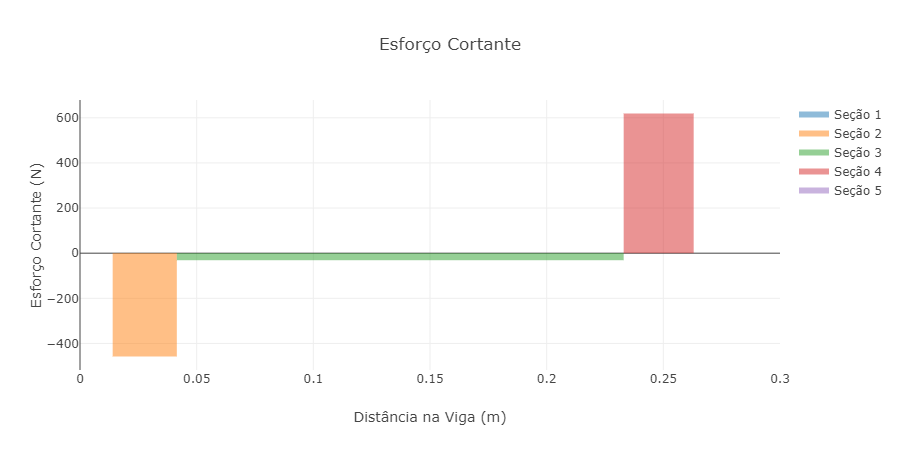

In [257]:
Image('Esforço_Cortante_XZ.png')

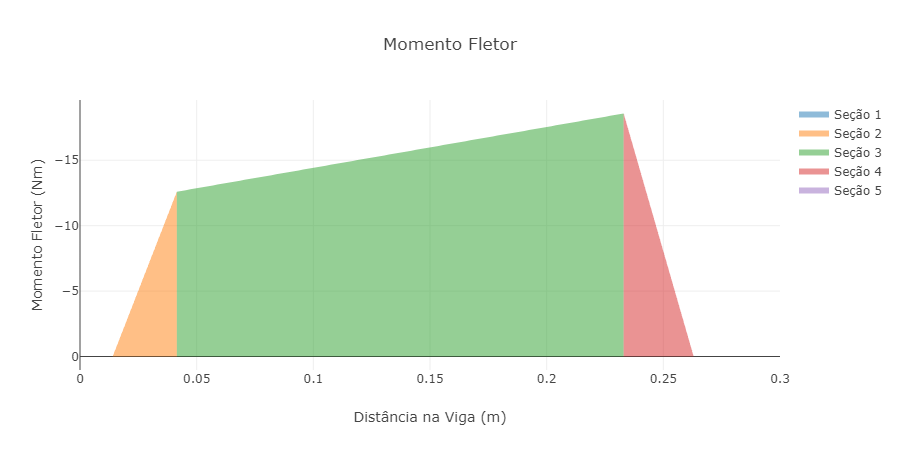

In [258]:
Image('Momento_Fletor_XZ.png')

In [259]:
V_xz = 619.07 # N
M_xz = -18.5721 # Nm

$$\text{Plano} \ XY$$

In [260]:
# Reações de Apoio
Rar = 155.3176 # N
Rbr = 236.6824 # N 

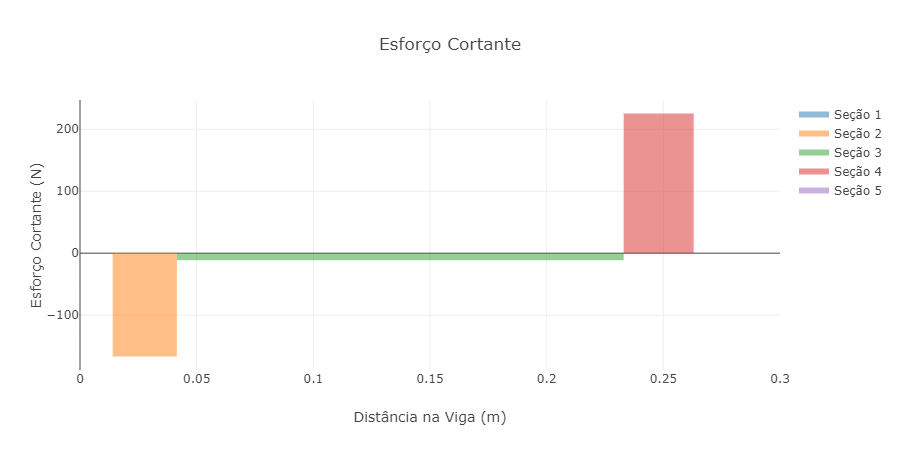

In [261]:
Image('Esforço_Cortante_XY.png')

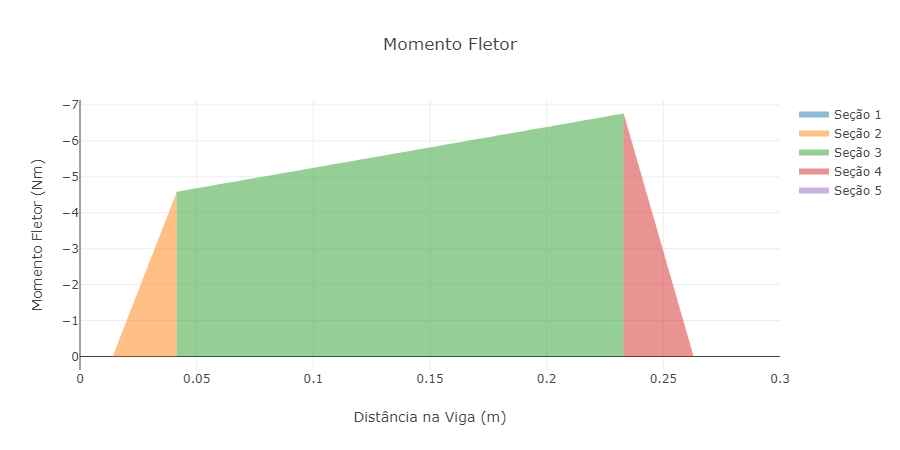

In [262]:
Image('Momento_Fletor_XY.png')

In [263]:
V_xy = 225.32 # N
M_xy = -6.7596 # Nm

O Ponto Crítico, de acordo com o que foi visto nos gráficos, é em x = 0.233m

Necessário utilizar a resultante de ambos:

In [264]:
V_res = sqrt(V_xy**2 + V_xz**2)
M_res = sqrt(M_xy**2 + M_xz**2)
display(Math('V_{res} = \\sqrt{V_{xy}^2 + V_{xz}^2} = %s \ N'%round(V_res,2)))
display(Math('M_{res} = \sqrt{M_{xy}^2 + M_{xz}^2} = %s \ Nm'%round(M_res,2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

$$\text{Seleção de Material:}$$

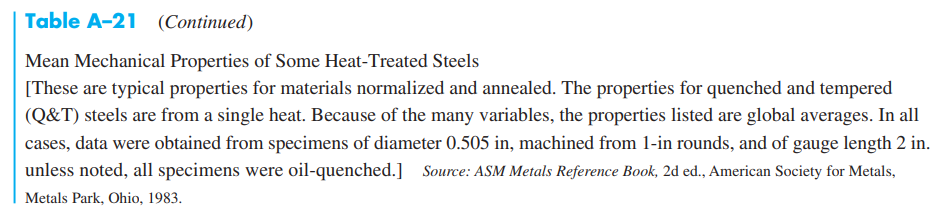

In [265]:
Image('A-21.png')

Os dados do material selecionado foram tirados da Tabela A-21 presente na oitava edição de Shigley's Mechanical Engineering Design.

Aço 4340 Temperado e Revenido à 650°C

In [266]:
Sy = 855*10**6 # Pa
Sut = 965*10**6 # Pa

---

$$\text{Dimensionamento Estático}$$

Em projetos de eixo, costuma-se utilizar fatores de segurança entre 2 e 3. Abaixo de 2 não considera-se confiável e acima de 3 um gasto superior ao necessário com o projeto.

Definiu-se que o fator de segurança no dimensionamento estático inicialmente seria 3. Dependendo dos requisitos e outros componentes do projeto, um diâmetro maior pode ser escolhido o que fará que esse fator de segurança suba posteriormente.   
Além disso, após passar pelas etapas de dimensionamento à fadiga, este fator de segurança inicial cresce.

In [267]:
FS = 3

O critério de Tresca é mais conservativo que o de Von Mises, por considerar como falha metade do limite de escoamento.

Obtendo as tensões e utilizando o critério de Tresca afim de determinar diâmetro:

In [268]:
d = sy.symbols('d')
σx = (32*M_res) / (pi*d**3)
σy = 0
τxy = (16*T) / (pi*d**3)
display(Math('σ_x = \\frac{32M_{res}}{\pi d^3} =  %s'%sy.latex(σx)))
display(Math('τ_{xy} = \\frac{16 T}{\pi d^3} = %s'%sy.latex(τxy)))
display(Math(f'σ_y = {sy.latex(σy)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [269]:
σadm = 0.5*Sy / FS
display(Math('σ_{adm} = \\frac{0.5 S_y}{FS} = %s \ MPa'%sy.latex(σadm*10**-6)))

<IPython.core.display.Math object>

$\sigma_{adm} = \sqrt{\frac{\sigma_x - \sigma_y}{2}^2 + \tau_{xy}^2}$

In [270]:
EQ = sy.Eq(σadm, sy.sqrt(((σx - σy)/2)**2 + τxy**2))
EQ

Eq(142500000.0, 135.804003500059*sqrt(d**(-6)))

Resolvendo para o diâmetro:

In [271]:
d_min = sy.solve(EQ, d)[1]
display(Math('d_{min} = %s \ m'%sy.latex(d_min*1000)))

<IPython.core.display.Math object>

Este é o diâmetro mínimo para o dimensionamento estático. Conforme explicado a seguir, será utilizado um diâmetro maior.

---

$$\text{Catálogo de Engrenagem}$$

Conforme Catálogo Geral de Engrenagens para Correntes de Transmissão presente em anexo, para um pinhão com as características dadas:   
 - N° de dentes: 17
 - Norma: ASA
 - Passo: 9,525 mm  = 3/8"
 - Diâmetro Primitivo: 51,83 mm
 - A (comprimento): 28 mm   

O mínimo diâmetro do furo é 12mm e máximo furo recomendável é 27mm. Escolheu-se diversos diâmetros para os cálculos afim de determinar a melhor opção.

In [272]:
d_lista = array([12, 15, 20, 22, 25]) # mm
for i in range(0, len(d_lista)):
    display(Math(f'd_{i} = {d_lista[i]} \ mm'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$\text{Pandas:}$ Aqui introduziu-se um pacote python para realizar operações vetoriais e determinar diversos fatores de segurança para os diferentes diâmetros escolhidos

In [273]:
import pandas as pd
df = pd.DataFrame({'d [mm]': d_lista})

Nota importante: um aspecto que não pode ser ignorado no design de um eixo, são ressaltos. Isso significa seções com diferentes diâmetros que facilita a montagem dos componentes. Neste projeto, os rolamentos devem estar entre as engrenagens. Como as peças entram com interferência, seria muito oneroso posicionar o rolamento no seu devido local tendo que passar por interfência desde a ponta do eixo.   

Além disso, os ressaltos cumprem o papel de restringir o movimento axial dos componentes.

Definiu-se que o diâmetro maior deve ter 2mm a mais que o diâmetro menor.

In [274]:
df['D [mm]'] = d_lista + 2
D = df['D [mm]']
D

0    14
1    17
2    22
3    24
4    27
Name: D [mm], dtype: int32

---

$$\text{Dimensionamento à Fadiga}$$

Foi necessário determinar o Limite de Endurança ($S_e$).   
$S_e = k_a k_b k_c k_d k_e S_e'$

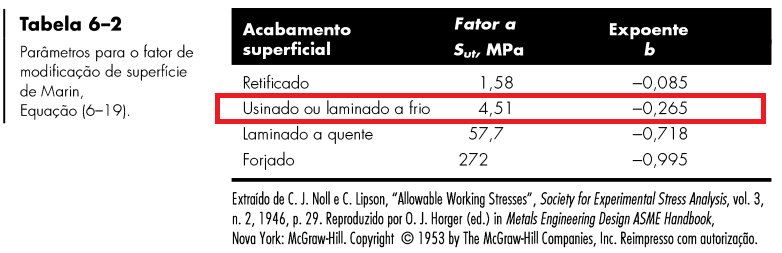

In [275]:
Image('ka.png')

$k_a = a S_{ut}^b$

In [276]:
a = 4.51
b = -0.265
df['ka'] = a*(Sut*10**-6)**b
ka = df['ka']
ka

0    0.729923
1    0.729923
2    0.729923
3    0.729923
4    0.729923
Name: ka, dtype: float64

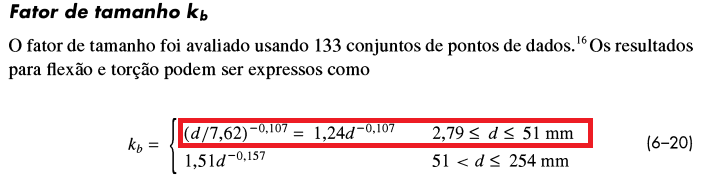

In [277]:
Image('kb.png')

In [278]:
df['kb'] = 1.24*(d_lista*10**3)**-0.107
kb = df['kb']
kb

0    0.453889
1    0.443180
2    0.429746
3    0.425385
4    0.419606
Name: kb, dtype: float64

In [279]:
df['kc'] = 1
df['kd'] = 1

kc = df['kc'] # Flexão
kd = df['kd'] # Temperatura

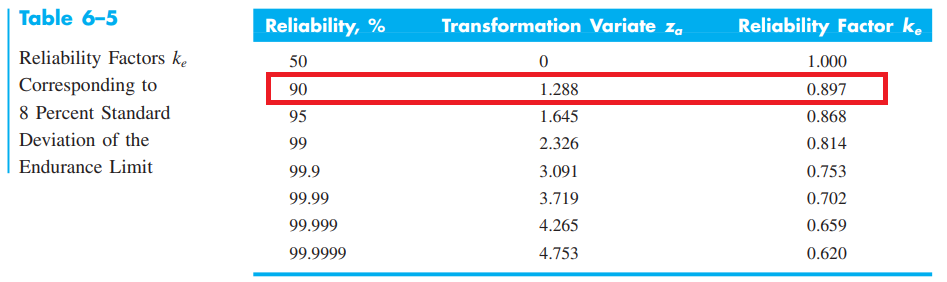

In [280]:
df['ke'] = 0.897
ke = df['ke']
Image('ke.png')

$S_e' = 0.5 S_{ut}$

In [281]:
df["Se' [MPa]"] = 0.5*Sut*10**-6
Se_ = df["Se' [MPa]"]
Se_

0    482.5
1    482.5
2    482.5
3    482.5
4    482.5
Name: Se' [MPa], dtype: float64

$S_e = k_a k_b k_c k_d k_e S_e'$

In [282]:
df['Se [MPa]'] = round(ka*kb*kc*kd*ke*Se_,2)
Se = df['Se [MPa]']

A tabela abaixo resume todos os resultados:

In [283]:
df

,d [mm],D [mm],ka,kb,kc,kd,ke,Se' [MPa],Se [MPa]
0,12,14,0.729923,0.453889,1,1,0.897,482.5,143.39
1,15,17,0.729923,0.443180,1,1,0.897,482.5,140.01
2,20,22,0.729923,0.429746,1,1,0.897,482.5,135.76
3,22,24,0.729923,0.425385,1,1,0.897,482.5,134.38
4,25,27,0.729923,0.419606,1,1,0.897,482.5,132.56


O critério de Soderberg é extremamente conservativo e se resguarda contra o escoamento. Foi o critério escolhido.

In [284]:
n, μ, Se_symbol, kf_sym, Ma, kfs_sym, Ta, Sy_symbol, Mm, Tm, d_soderberg = sy.symbols('n, μ, Se, kf, Ma, kfs, Ta, Sy, Mm, Tm, d')
DE_Soderberg = sy.Eq(1/n,
                     (16/(sy.pi*d_soderberg**3)) 
                     *
                     ((1/Se_symbol)*((4*(kf_sym*Ma)**2 + 3*(kfs_sym*Ta)**2)**(1/2))
                     +
                     (1/Sy_symbol)*((4*(kf_sym*Mm)**2 + 3*(kfs_sym*Tm)**2)**(1/2)))
                     )

DE_Soderberg

Eq(1/n, 16*((4*Mm**2*kf**2 + 3*Tm**2*kfs**2)**0.5/Sy + (4*Ma**2*kf**2 + 3*Ta**2*kfs**2)**0.5/Se)/(pi*d**3))

Em que:
 - n: fator de segurança
 - $K_f$: fator de concetração de tensão de fadiga para flexão
 - $K_{fs}$: fator de concetração de tensão de fadiga para torção
 - $M_a$: momento flexor alternante
 - $M_m$: momento flexor médio
 - $T_m$: torque médio
 - $T_a$: torque alternante
 - $S_e$: limite de endurância
 - $S_{y}$: limite de escoamento

Deve-se aplicar todos os valores obtidos e resolver para $n$.

Para determinar $k_f$ e $k_{fs}$, deve-se primeiro obter graficamente $k_t$ e $k_{ts}$.

In [285]:
df['r [mm]'] = 0.5 # Escolheu-se um valor padrão
r = df['r [mm]']

In [286]:
df['r/d'] = r / d_lista
df['D/d'] = df['D [mm]'] / d_lista

In [287]:
df

,d [mm],D [mm],ka,kb,kc,kd,ke,Se' [MPa],Se [MPa],r [mm],r/d,D/d
0,12,14,0.729923,0.453889,1,1,0.897,482.5,143.39,0.5,0.041667,1.166667
1,15,17,0.729923,0.443180,1,1,0.897,482.5,140.01,0.5,0.033333,1.133333
2,20,22,0.729923,0.429746,1,1,0.897,482.5,135.76,0.5,0.025000,1.100000
3,22,24,0.729923,0.425385,1,1,0.897,482.5,134.38,0.5,0.022727,1.090909
4,25,27,0.729923,0.419606,1,1,0.897,482.5,132.56,0.5,0.020000,1.080000


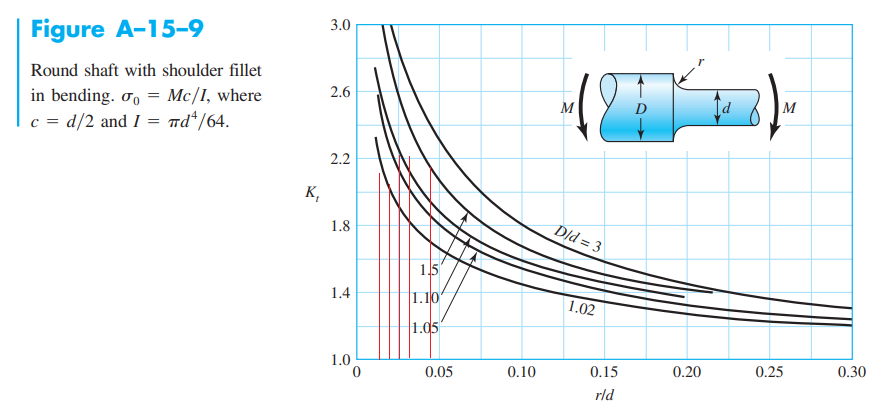

In [288]:
df['kt'] = [2.15, 2.20, 2.27, 1.85, 2.1]
kt = df['kt']
Image('A-15-9.png')

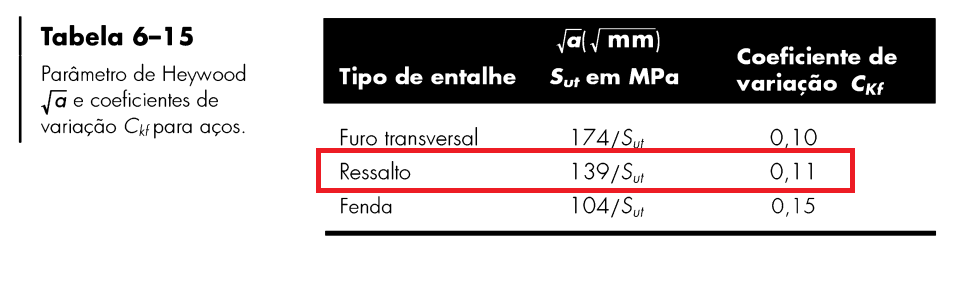

In [289]:
Image('6-15.png')

In [290]:
Sut_MPa = Sut*10**-6
raiz_a = 139/Sut_MPa

$k_f = 1 + \frac{k_t - 1}{1 + \frac{\sqrt{a}}{\sqrt{r}}}$

In [291]:
kf_ = 1 + ((kt - 1) / (1 + (raiz_a/(r**0.5))))
df['kf'] = kf_
kf = df['kf']
kf

0    1.955383
1    1.996922
2    2.055075
3    1.706153
4    1.913845
Name: kf, dtype: float64

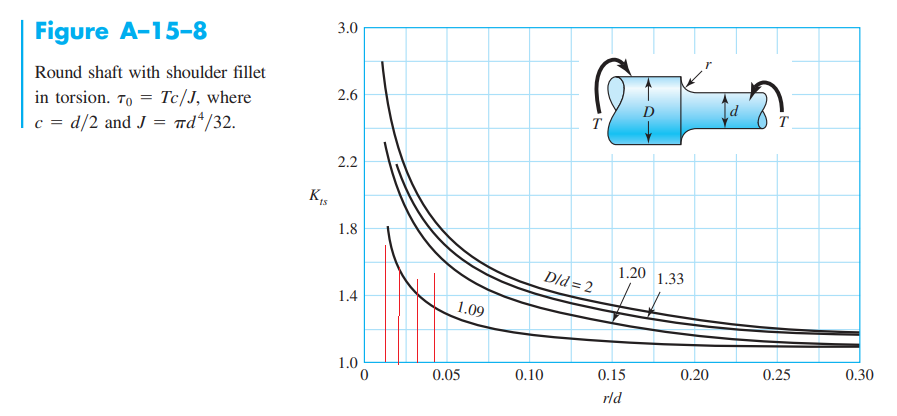

In [292]:
Image('A-15-8.png')

In [293]:
df['kts'] = [1.55, 1.45, 1.41, 1.09, 1.65]
kts = df['kts']

$k_{fs} = 1 + \frac{k_{ts} - 1}{1 + \frac{\sqrt{a}}{\sqrt{r}}}$

In [294]:
df['kfs'] = 1 + ((kts - 1) / (1 + (raiz_a/(r**0.5))))
kfs = df['kfs']
kfs

0    1.456922
1    1.373846
2    1.340615
3    1.074769
4    1.539999
Name: kfs, dtype: float64

Além disso:
 - $M_m = T_a = 0$
 - $M_a = M_{max} = M_{res}$
 - $T_m = T$

Voltando ao Crtitério de Soderberg:

In [295]:
DE_Soderberg

Eq(1/n, 16*((4*Mm**2*kf**2 + 3*Tm**2*kfs**2)**0.5/Sy + (4*Ma**2*kf**2 + 3*Ta**2*kfs**2)**0.5/Se)/(pi*d**3))

Um resumo de tudo que foi obtido:

In [296]:
df

,d [mm],D [mm],ka,kb,kc,kd,ke,Se' [MPa],Se [MPa],r [mm],r/d,D/d,kt,kf,kts,kfs
0,12,14,0.729923,0.453889,1,1,0.897,482.5,143.39,0.5,0.041667,1.166667,2.15,1.955383,1.55,1.456922
1,15,17,0.729923,0.443180,1,1,0.897,482.5,140.01,0.5,0.033333,1.133333,2.20,1.996922,1.45,1.373846
2,20,22,0.729923,0.429746,1,1,0.897,482.5,135.76,0.5,0.025000,1.100000,2.27,2.055075,1.41,1.340615
3,22,24,0.729923,0.425385,1,1,0.897,482.5,134.38,0.5,0.022727,1.090909,1.85,1.706153,1.09,1.074769
4,25,27,0.729923,0.419606,1,1,0.897,482.5,132.56,0.5,0.020000,1.080000,2.10,1.913845,1.65,1.539999


Substitui-se os valores:

In [297]:
DE_Soderberg = DE_Soderberg.subs({
    Ma: M_res,
    Ta: 0,
    Tm: T,
    Mm: 0,
    Sy_symbol: Sy,   
})

DE_Soderberg

Eq(1/n, 16*(3.62616484859449e-8*(kfs**2)**0.5 + 39.5279693670191*(kf**2)**0.5/Se)/(pi*d**3))

In [298]:
n_expression = sy.solve(DE_Soderberg, n)[0]
display(Math(f'n = {sy.latex(n_expression)}'))

<IPython.core.display.Math object>

Resolve-se a equação para os cinco casos estudados.

Os fatores de segurança em fadiga para cada diâmetro analisado são:

In [299]:
def solve_expr(row):
    return n_expression.subs({Se_symbol: row['Se [MPa]']*10**6, d_soderberg: row['d [mm]']*10**-3, 
                              kf_sym: row['kf'], kfs_sym: row['kfs']}).simplify()


df['n'] = df.apply(solve_expr, axis=1).astype(float)
df.round(2)

,d [mm],D [mm],ka,kb,kc,kd,ke,Se' [MPa],Se [MPa],r [mm],r/d,D/d,kt,kf,kts,kfs,n
0,12,14,0.73,0.45,1,1,0.9,482.5,143.39,0.5,0.04,1.17,2.15,1.96,1.55,1.46,0.57
1,15,17,0.73,0.44,1,1,0.9,482.5,140.01,0.5,0.03,1.13,2.20,2.00,1.45,1.37,1.08
2,20,22,0.73,0.43,1,1,0.9,482.5,135.76,0.5,0.02,1.10,2.27,2.06,1.41,1.34,2.43
3,22,24,0.73,0.43,1,1,0.9,482.5,134.38,0.5,0.02,1.09,1.85,1.71,1.09,1.07,3.87
4,25,27,0.73,0.42,1,1,0.9,482.5,132.56,0.5,0.02,1.08,2.10,1.91,1.65,1.54,4.90


Dos fatores de segurança obtidos, o único compreendido entre 2 e 3 é 2.43.   
Considerando que o critério de Soderberg é mais conservativo que os demais, pode-se dizer que este fator está excelente.

O eixo deverá ter então:
 - $D = 22 \ mm$
 - $d = 20 \ mm$
 - $r = 0.5 \ mm$
 - $D_{centro} = 24 \ mm$

O $D_{centro}$ não havia sido introduzido anteriormente. Até o momento, calculou-se o necessário para a seção crítica apenas.    
Deseja-se um diâmetro maior no centro do eixo pelo aspecto já citado: montagem e operação.    
Dessa forma, os rolamentos terão sua restrição de movimento axial, assim como as engrenagens possuem em um dos lados.